In [42]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
import warnings
# warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

00:08:52 INFO      Region of Interest:                                                                   ]8;id=675450;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=814147;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=987923;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=129283;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (276.882, -11.489), model radius:     ]8;id=227217;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=832534;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  7.000 deg, display radius: 6.500 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=218572;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=358838;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=158248;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=890727;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=124915;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=885857;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 84 x 84 px                                                             ]8;id=440075;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=198725;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=201312;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=613334;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=404757;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=966226;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=231809;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=691575;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=682395;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=639313;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=96226;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=850426;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=654117;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=272479;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=725762;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=243412;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=325529;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=167306;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=517584;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=698681;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=250250;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=62909;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,1.912300e+06,1.890370e+06,1.011601,30460,99.86283
1,1,1024,RING,1.068157e+06,1.046597e+06,1.020600,30460,99.86283
2,2,1024,RING,1.897779e+05,1.829351e+05,1.037405,30460,99.86283
3,3,1024,RING,7.547907e+04,7.138014e+04,1.057424,30460,99.86283
4,4,1024,RING,1.752258e+04,1.629416e+04,1.075390,30460,99.86283
5,5,1024,RING,5.342905e+03,4.608799e+03,1.159284,30460,99.86283


         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=238998;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=379945;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=499779;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=963417;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=626123;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=552214;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=505413;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=531314;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=393643;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=631959;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=464324;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=659527;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

00:08:53 INFO      Set WCDA tansit from: 795.9613310185185 to 796.2928263888889                         ]8;id=784030;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py\Mymap.py]8;;\:]8;id=202127;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py#41\41]8;;\

00:08:54 INFO      J1813M1245 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=751927;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=270516;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=861989;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=972421;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=2.44e-13 kb=(1.00e-15, 9.04e-13) index=-2.61 indexb=(-4.00,-1.00)                             

         INFO      Mor: fitrange=1.68                                                                  ]8;id=27829;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=371892;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#353\353]8;;\

         INFO      J1814M1719u in model_radius: 7 sf:True pf:True kf:True indexf:True                  ]8;id=936811;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=240979;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=159002;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=263234;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=2.65e-12 kb=(1.00e-15, 6.34e-12) index=-2.83 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=631438;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=157232;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.71 sb=(0.15,1.27) fitrange=2.16                                                         

         INFO      J1825M1418 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=672350;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=806832;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=700832;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=664413;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=3.92e-12 kb=(4.70e-13, 7.37e-12) index=-2.98 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=926991;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=735717;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.81 sb=(0.41,1.21) fitrange=1.52                                                         

         INFO      J1825M1256u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=742162;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=687481;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=212207;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=859794;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=8.27e-13 kb=(1.70e-14, 1.64e-12) index=-2.61 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=665783;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=331045;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.24 sb=(0.00,0.48) fitrange=0.64                                                         

         INFO      J1825M1337u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=233340;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=329990;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=756886;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=596625;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.04e-12 kb=(2.00e-13, 1.88e-12) index=-2.55 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=555772;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=659339;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.17 sb=(0.01,0.33) fitrange=0.40                                                         

         INFO      J1831M1007u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=290918;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=65745;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=237238;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=595458;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.78e-12 kb=(1.90e-13, 3.37e-12) index=-2.71 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=411439;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=435613;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.78 sb=(0.46,1.10) fitrange=1.28                                                         

         INFO      J1834M0831 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=891602;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=409271;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=107402;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=648295;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=5.99e-13 kb=(1.00e-15, 2.23e-12) index=-3.08 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=546643;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=801426;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.40 sb=(0.00,0.96) fitrange=1.76                                                         

         INFO      J1837M0654u in model_radius: 7 sf:True pf:True kf:True indexf:True                  ]8;id=260188;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=890512;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=147525;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=222763;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.55e-12 kb=(7.40e-13, 2.36e-12) index=-2.92 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=156240;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=23258;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.34 sb=(0.26,0.42) fitrange=0.48                                                         

         INFO      J1839M0548u in model_radius: 7 sf:True pf:True kf:True indexf:True                  ]8;id=973400;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=834908;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=74696;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=303282;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.62e-13 kb=(2.70e-14, 8.97e-13) index=-2.65 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=765568;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=204951;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.22 sb=(0.06,0.38) fitrange=0.56                                                         

         INFO      Set diffuse range: [11, 27] [-8, 8]                                                ]8;id=497613;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=885610;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1054\1054]8;;\

         INFO      ra dec coner:                                                                      ]8;id=58768;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=464236;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1055\1055]8;;\

         INFO      (280.0678675034105, -23.118891913051822)                                           ]8;id=154506;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=875244;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1056\1056]8;;\

         INFO      (287.34086682842513, -8.890290164211233)                                           ]8;id=332056;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=780101;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1057\1057]8;;\

         INFO      (273.03715951687303, -1.5828020256848583)                                          ]8;id=355292;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=931719;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1058\1058]8;;\

         INFO      (265.1960440779179, -15.40968155547338)                                            ]8;id=789232;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=638378;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1059\1059]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=190861;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=762147;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1098\1098]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 1.1782021422056108e-05                                                ]8;id=999034;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=43588;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1099\1099]8;;\
                  ratio: 0.09297849542461918                                                                       

         INFO      set K to: 1e-12                                                                    ]8;id=302145;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=251713;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1100\1100]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_case9_dust_bkg_template.fits            ]8;id=354495;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=905609;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1127\1127]8;;\

Model summary:
==============

                  N
Point sources     1
Extended sources  9
Particle sources  0

Free parameters (14):
--------------------

                                         value min_value max_value   
J1813M1245.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
J1813M1245.spectrum.main.Powerlaw.index  -2.61      -4.0      -1.0   
J1825M1418.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1825M1418.spectrum.main.Powerlaw.index  -2.98      -4.0      -1.0   
J1825M1256u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1825M1256u.spectrum.main.Powerlaw.index -2.61      -4.0      -1.0   
J1825M1337u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1825M1337u.spectrum.main.Powerlaw.index -2.55      -4.0      -1.0   
J1831M1007u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1831M1007u.spectrum.main.Powerlaw.index -2.71      -4.0      -1.0   
J1834M0831.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1834M0831.spectrum.main.Powerlaw.index  -3.08      -4.0      -1.0   
Diffuse.spectrum.main.Powerlaw.K           0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index      -2.5      -4.5      -0.5   

                                                    unit  
J1813M1245.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1813M1245.spectrum.main.Powerlaw.index                   
J1825M1418.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1825M1418.spectrum.main.Powerlaw.index                   
J1825M1256u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1825M1256u.spectrum.main.Powerlaw.index                  
J1825M1337u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1825M1337u.spectrum.main.Powerlaw.index                  
J1831M1007u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1831M1007u.spectrum.main.Powerlaw.index                  
J1834M0831.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1834M0831.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (45):
---------------------

                                                                                      value   
J1813M1245.position.ra                                                               273.35  \
J1813M1245.position.dec                                                              -12.73   
J1813M1245.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1814M1719u.Gaussian_on_sphere.lon0                                                  273.69   
J1814M1719u.Gaussian_on_sphere.lat0                                                  -17.33   
J1814M1719u.Gaussian_on_sphere.sigma                                                   0.71   
J1814M1719u.spectrum.main.Powerlaw.K                                                    0.0   
J1814M1719u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1814M1719u.spectrum.main.Powerlaw.index                                              -2.83   
J1825M1418.Gaussian_on_sphere.lon0                                                   276.29   
J1825M1418.Gaussian_on_sphere.lat0                                                   -14.32   
J1825M1418.Gaussian_on_sphere.sigma                                                    0.81   
J1825M1418.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1825M1256u.Gaussian_on_sphere.lon0                                                  276.55   
J1825M1256u.Gaussian_on_sphere.lat0                                                  -13.04   
J1825M1256u.Gaussian_on_sphere.sigma                                                   0.24   
J1825M1256u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1825M1337u.Gaussian_on_sphere.lon0                                                  276.55   
J1825M1337u.Gaussian_on_sphere.lat0                     

00:08:55 INFO      Considering 6 dec bins for extended source J1814M1719u           ]8;id=808049;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=663511;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -17.330                     ]8;id=882243;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=678103;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1825M1418            ]8;id=735854;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=439969;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -14.320                     ]8;id=395260;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=409407;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1825M1256u           ]8;id=987834;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=73579;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.040                     ]8;id=689234;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=278260;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J1825M1337u           ]8;id=22409;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=94631;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.730                     ]8;id=941344;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=568112;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1831M1007u           ]8;id=722069;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=715928;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -10.120                     ]8;id=138766;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=403969;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1834M0831            ]8;id=76201;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=921642;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -8.530                      ]8;id=498430;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=451251;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1837M0654u           ]8;id=377345;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=983452;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -6.900                      ]8;id=242544;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=638169;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1839M0548u           ]8;id=510187;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=950163;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.900                      ]8;id=291439;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=785721;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=379502;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=87467;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -12.217                     ]8;id=938956;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=616052;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=601410;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=316741;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=85237;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=342675;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
J1813M1245.spectrum.main.Powerlaw.K,(1.5 -0.5 +0.7) x 10^-22,1 / (keV s cm2)
J1813M1245.spectrum.main.Powerlaw.index,-2.54 +/- 0.18,
J1825M1418.spectrum.main.Powerlaw.K,(2.95 -0.25 +0.27) x 10^-21,1 / (keV s cm2)
J1825M1418.spectrum.main.Powerlaw.index,-2.97 +/- 0.06,
J1825M1256u.spectrum.main.Powerlaw.K,(6.5 -1.0 +1.1) x 10^-22,1 / (keV s cm2)
J1825M1256u.spectrum.main.Powerlaw.index,-2.59 +/- 0.08,
J1825M1337u.spectrum.main.Powerlaw.K,(9.2 -1.1 +1.3) x 10^-22,1 / (keV s cm2)
J1825M1337u.spectrum.main.Powerlaw.index,-2.57 +/- 0.06,
J1831M1007u.spectrum.main.Powerlaw.K,(1.24 -0.12 +0.13) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00,-0.93,0.01,0.01,0.01,-0.01,0.00,-0.00,0.05,-0.02,0.06,-0.02,-0.10,0.04
-0.93,1.00,-0.00,-0.01,-0.01,0.01,-0.00,0.00,-0.04,0.02,-0.05,0.02,0.08,-0.04
0.01,-0.00,1.00,-0.63,-0.12,0.12,-0.49,0.40,0.15,-0.06,0.19,-0.05,-0.31,0.11
0.01,-0.01,-0.63,1.00,0.11,-0.13,0.25,-0.31,-0.04,0.06,-0.05,0.06,0.10,-0.19
0.01,-0.01,-0.12,0.11,1.00,-0.90,-0.31,0.26,0.06,-0.02,0.10,-0.03,-0.17,0.08
-0.01,0.01,0.12,-0.13,-0.90,1.00,0.25,-0.25,-0.04,0.02,-0.07,0.04,0.11,-0.10
0.00,-0.00,-0.49,0.25,-0.31,0.25,1.00,-0.91,-0.04,0.01,-0.05,0.01,0.08,-0.01
-0.00,0.00,0.40,-0.31,0.26,-0.25,-0.91,1.00,0.02,-0.01,0.03,-0.01,-0.05,0.01
0.05,-0.04,0.15,-0.04,0.06,-0.04,-0.04,0.02,1.00,-0.80,0.12,0.02,-0.52,0.27
-0.02,0.02,-0.06,0.06,-0.02,0.02,0.01,-0.01,-0.80,1.00,-0.01,-0.02,0.29,-0.36
0.06,-0.05,0.19,-0.05,0.10,-0.07,-0.05,0.03,0.12,-0.01,1.00,-0.55,-0.59,0.26


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,7953.194281
total,7953.194281


Values of statistical measures:

,statistical measures
AIC,15934.390860
BIC,16076.011569


Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

00:10:02 INFO      Considering 6 dec bins for extended source J1814M1719u           ]8;id=963909;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=522658;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -17.330                     ]8;id=106504;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=501411;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1825M1418            ]8;id=980862;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=337434;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -14.320                     ]8;id=852075;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=378871;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1825M1256u           ]8;id=572329;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=218922;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.040                     ]8;id=374333;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=227858;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J1825M1337u           ]8;id=513930;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=252639;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.730                     ]8;id=193307;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=160210;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1831M1007u           ]8;id=518336;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=680032;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -10.120                     ]8;id=195925;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=338939;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1834M0831            ]8;id=953444;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=337438;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -8.530                      ]8;id=198508;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=460204;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1837M0654u           ]8;id=564165;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=97078;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -6.900                      ]8;id=163300;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=436955;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1839M0548u           ]8;id=534667;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=585571;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.900                      ]8;id=366390;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=277507;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=593100;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=213648;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -12.217                     ]8;id=101664;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=985309;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(274.833984375, -10.23782128102205)


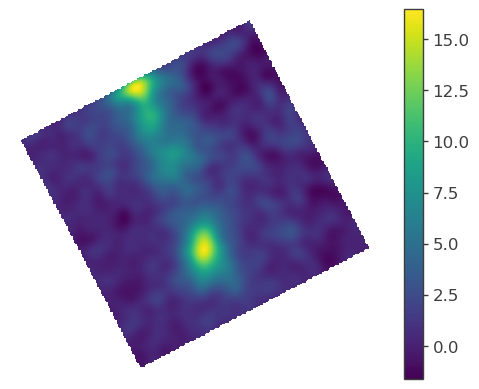

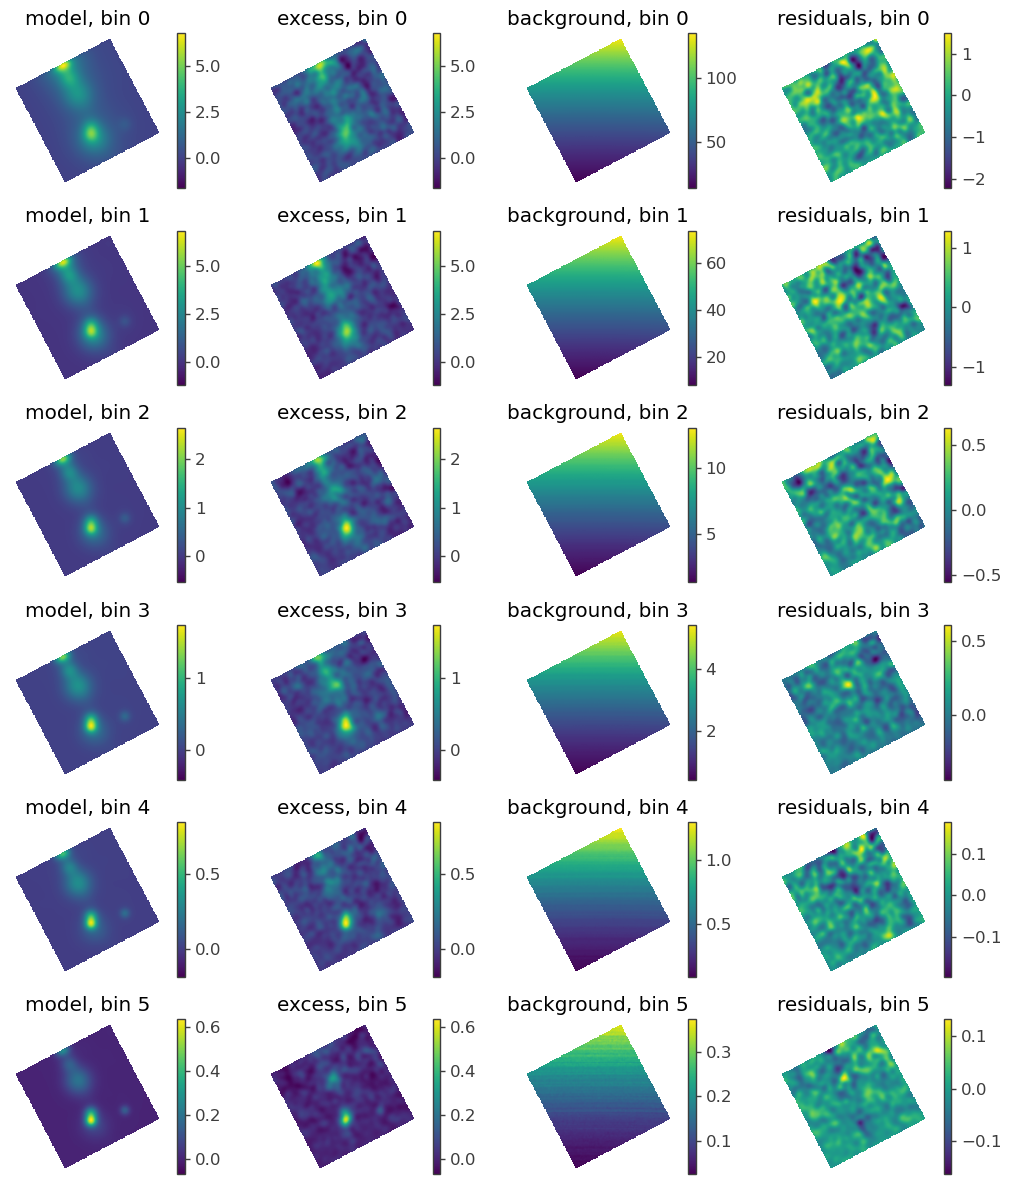

<Figure size 640x480 with 0 Axes>

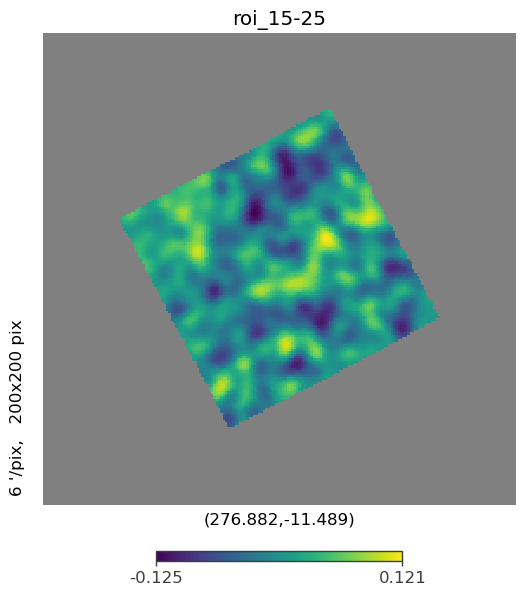

LHAASO:  1 273.36 -12.75  1LHAASO J1813-1245  0.0
LHAASO:  2 273.35 -12.73  1LHAASO J1813-1245   0.0
LHAASO:  3 273.69 -17.33 1LHAASO J1814-1719u*  0.71
LHAASO:  4 273.27 -17.89 1LHAASO J1814-1719u*   0.0
LHAASO:  5 273.72 -16.62  1LHAASO J1814-1636u  0.68
LHAASO:  6 273.72 -16.62  1KM2A J1814-1636u  0
LHAASO:  7 276.29 -14.32 1LHAASO J1825-1418  0.81
LHAASO:  8 276.25 -14.0 1LHAASO J1825-1418   0.81
LHAASO:  9 276.44 -12.94  1LHAASO J1825-1256u  0.0
LHAASO:  10 276.55 -13.04  1LHAASO J1825-1256u   0.24
LHAASO:  11 276.45 -13.63  1LHAASO J1825-1337u  0.0
LHAASO:  12 276.55 -13.73  1LHAASO J1825-1337u   0.17
LHAASO:  13 277.75 -10.12 1LHAASO J1831-1007u*  0.78
LHAASO:  14 277.81 -9.83 1LHAASO J1831-1007u*   0.26
LHAASO:  15 277.84 -10.48  1LHAASO J1831-1028  0.94
LHAASO:  16 277.84 -10.48  1KM2A J1831-1028  0
LHAASO:  17 278.62 -8.53 1LHAASO J1834-0831  0.4
LHAASO:  18 278.44 -8.38 1LHAASO J1834-0831   0.4
LHAASO:  19 279.39 -6.9 1LHAASO J1837-0654u  0.34
LHAASO:  20 279.31 -6.86 1LHAAS

Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(6 +/- 6) x 10^-22,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1418.353973
total,1418.353973


Values of statistical measures:

,statistical measures
AIC,2838.707968
BIC,2848.823875


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(4.3 +/- 0.6) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1443.095142
total,1443.095142


Values of statistical measures:

,statistical measures
AIC,2888.190305
BIC,2898.306212


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(5.7 +/- 0.8) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1400.61128
total,1400.61128


Values of statistical measures:

,statistical measures
AIC,2803.222581
BIC,2813.338489


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(6.0 +/- 0.8) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1323.046886
total,1323.046886


Values of statistical measures:

,statistical measures
AIC,2648.093794
BIC,2658.209701


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(9 +/- 9) x 10^-22,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1176.641383
total,1176.641383


Values of statistical measures:

,statistical measures
AIC,2355.282789
BIC,2365.398696


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(3 +/- 9) x 10^-22,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1162.48301
total,1162.48301


Values of statistical measures:

,statistical measures
AIC,2326.966043
BIC,2337.081950


100%|██████████| 6/6 [02:01<00:00, 20.21s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



00:13:34 INFO      Region of Interest:                                                                   ]8;id=260821;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=420529;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=947829;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=157122;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (281.522, -2.609), model radius:      ]8;id=356007;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=740374;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  7.000 deg, display radius: 6.500 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=558607;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=580215;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=35828;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=46510;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=188913;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=237742;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 84 x 84 px                                                             ]8;id=93278;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=326704;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=873823;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=913675;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=128127;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=486268;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=776931;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=747357;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=541195;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=919491;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=509611;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=680495;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=346282;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=139136;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=900402;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=761917;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=217746;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=242096;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=523615;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=21620;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=126104;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=104001;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,5.178574e+06,5.125754e+06,1.010305,30470,99.895615
1,1,1024,RING,2.823704e+06,2.769105e+06,1.019717,30470,99.895615
2,2,1024,RING,5.113459e+05,4.910174e+05,1.041401,30470,99.895615
3,3,1024,RING,2.168321e+05,2.038489e+05,1.063691,30470,99.895615
4,4,1024,RING,5.586728e+04,5.122473e+04,1.090631,30470,99.895615
5,5,1024,RING,1.611700e+04,1.409437e+04,1.143506,30470,99.895615


         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=585430;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=104587;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.93 Mb                                                         ]8;id=975573;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=752626;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=149554;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=537142;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=78913;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=294074;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=22620;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=522379;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=625333;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=76892;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

00:13:35 INFO      Set WCDA tansit from: 795.9613310185185 to 796.2928263888889                         ]8;id=730746;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py\Mymap.py]8;;\:]8;id=451974;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py#41\41]8;;\

00:13:37 INFO      J1834M0831 in model_radius: 7 sf:True pf:True kf:True indexf:True                   ]8;id=647535;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=640876;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=554746;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=804769;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=5.99e-13 kb=(1.00e-15, 2.23e-12) index=-3.08 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=876064;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=55312;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.40 sb=(0.00,0.96) fitrange=1.76                                                         

         INFO      J1837M0654u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=42426;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=732809;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=828280;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=201862;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.55e-12 kb=(7.40e-13, 2.36e-12) index=-2.92 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=230826;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=270691;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.34 sb=(0.26,0.42) fitrange=0.48                                                         

         INFO      J1839M0548u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=40288;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=883897;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=374717;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=696505;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.62e-13 kb=(2.70e-14, 8.97e-13) index=-2.65 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=661147;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=459926;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.22 sb=(0.06,0.38) fitrange=0.56                                                         

         INFO      J1841M0519 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=612351;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=514034;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=456633;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=173791;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.52e-12 kb=(2.60e-13, 2.78e-12) index=-2.88 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=48584;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=461500;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.60 sb=(0.36,0.84) fitrange=0.72                                                         

         INFO      J1843M0335u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=390667;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=540047;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=273379;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=393426;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=9.01e-13 kb=(2.56e-13, 1.55e-12) index=-2.58 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=240904;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=581236;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.40 sb=(0.24,0.56) fitrange=0.48                                                         

         INFO      J1848M0153u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=202180;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=829370;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=47891;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=513609;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=7.05e-13 kb=(1.05e-13, 1.31e-12) index=-2.65 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=910060;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=395083;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.51 sb=(0.27,0.75) fitrange=0.80                                                         

         INFO      J1850M0004u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=235304;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=139244;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=244990;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=473958;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=5.30e-13 kb=(5.00e-14, 1.01e-12) index=-2.49 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=969197;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=972294;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.46 sb=(0.30,0.62) fitrange=0.64                                                         

         INFO      J1852P0050u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=63156;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=237774;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=414038;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=282768;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.67e-13 kb=(1.00e-15, 1.52e-12) index=-2.74 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=420996;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=680230;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.64 sb=(0.08,1.20) fitrange=1.60                                                         

         INFO      J1857P0245 in model_radius: 7 sf:True pf:True kf:True indexf:True                   ]8;id=578949;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=924023;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=867300;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=519404;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.04e-13 kb=(1.00e-15, 1.26e-12) index=-2.93 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=19840;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=788561;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.24 sb=(0.00,0.56) fitrange=0.88                                                         

         INFO      J1857P0203u in model_radius: 7 sf:True pf:True kf:True indexf:True                  ]8;id=994778;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=400557;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=702889;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=329646;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.68e-13 kb=(1.00e-15, 8.13e-13) index=-2.46 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=368274;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=145931;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.19 sb=(0.00,0.43) fitrange=0.88                                                         

         INFO      Set diffuse range: [21, 37] [-8, 8]                                                ]8;id=565544;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=749494;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1054\1054]8;;\

         INFO      ra dec coner:                                                                      ]8;id=821987;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=775600;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1055\1055]8;;\

         INFO      (284.66287268005993, -14.221694714345416)                                          ]8;id=541940;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=927228;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1056\1056]8;;\

         INFO      (291.8282373790319, -0.053737660060655834)                                         ]8;id=238701;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=909355;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1057\1057]8;;\

00:13:38 INFO      (277.5482046049872, 7.237553105845498)                                             ]8;id=601474;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=87199;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1058\1058]8;;\

         INFO      (270.2228348770985, -6.8201447811565)                                              ]8;id=372713;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=63118;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1059\1059]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=700660;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=182799;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1098\1098]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 1.2135965670569618e-05                                                ]8;id=343080;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=620384;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1099\1099]8;;\
                  ratio: 0.09577166669057675                                                                       

         INFO      set K to: 1e-12                                                                    ]8;id=159746;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=943191;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1100\1100]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_case9_dust_bkg_template.fits            ]8;id=785285;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=354710;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1127\1127]8;;\

Model summary:
==============

                   N
Point sources      0
Extended sources  11
Particle sources   0

Free parameters (16):
--------------------

                                         value min_value max_value   
J1837M0654u.spectrum.main.Powerlaw.K       0.0       0.0       0.0  \
J1837M0654u.spectrum.main.Powerlaw.index -2.92      -4.0      -1.0   
J1839M0548u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1839M0548u.spectrum.main.Powerlaw.index -2.65      -4.0      -1.0   
J1841M0519.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1841M0519.spectrum.main.Powerlaw.index  -2.88      -4.0      -1.0   
J1843M0335u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1843M0335u.spectrum.main.Powerlaw.index -2.58      -4.0      -1.0   
J1848M0153u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1848M0153u.spectrum.main.Powerlaw.index -2.65      -4.0      -1.0   
J1850M0004u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1850M0004u.spectrum.main.Powerlaw.index -2.49      -4.0      -1.0   
J1852P0050u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1852P0050u.spectrum.main.Powerlaw.index -2.74      -4.0      -1.0   
Diffuse.spectrum.main.Powerlaw.K           0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index      -2.5      -4.5      -0.5   

                                                    unit  
J1837M0654u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1837M0654u.spectrum.main.Powerlaw.index                  
J1839M0548u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1839M0548u.spectrum.main.Powerlaw.index                  
J1841M0519.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1841M0519.spectrum.main.Powerlaw.index                   
J1843M0335u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1843M0335u.spectrum.main.Powerlaw.index                  
J1848M0153u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1848M0153u.spectrum.main.Powerlaw.index                  
J1850M0004u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1850M0004u.spectrum.main.Powerlaw.index                  
J1852P0050u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1852P0050u.spectrum.main.Powerlaw.index                  
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (50):
---------------------

                                                                                      value   
J1834M0831.Gaussian_on_sphere.lon0                                                   278.62  \
J1834M0831.Gaussian_on_sphere.lat0                                                    -8.53   
J1834M0831.Gaussian_on_sphere.sigma                                                     0.4   
J1834M0831.spectrum.main.Powerlaw.K                                                     0.0   
J1834M0831.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1834M0831.spectrum.main.Powerlaw.index                                               -3.08   
J1837M0654u.Gaussian_on_sphere.lon0                                                  279.39   
J1837M0654u.Gaussian_on_sphere.lat0                                                    -6.9   
J1837M0654u.Gaussian_on_sphere.sigma                                                   0.34   
J1837M0654u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1839M0548u.Gaussian_on_sphere.lon0                                                  279.85   
J1839M0548u.Gaussian_on_sphere.lat0                                                    -5.9   
J1839M0548u.Gaussian_on_sphere.sigma                                                   0.22   
J1839M0548u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1841M0519.Gaussian_on_sphere.lon0                                                   280.33   
J1841M0519.Gaussian_on_sphere.lat0                                             

00:13:39 INFO      Considering 6 dec bins for extended source J1834M0831            ]8;id=660833;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=80726;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -8.530                      ]8;id=33678;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=251650;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1837M0654u           ]8;id=670590;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=50259;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -6.900                      ]8;id=747246;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=181591;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1839M0548u           ]8;id=639977;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=349579;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.900                      ]8;id=320214;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=730898;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1841M0519            ]8;id=516470;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=663714;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.330                      ]8;id=738297;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=26414;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1843M0335u           ]8;id=989951;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=472201;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.500                      ]8;id=735123;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=94028;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1848M0153u           ]8;id=240657;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=659126;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -1.890                      ]8;id=803434;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=857959;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1850M0004u           ]8;id=860849;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=898389;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -0.070                      ]8;id=15996;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=971175;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1852P0050u           ]8;id=226387;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=162220;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.400                       ]8;id=253079;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=801576;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0245            ]8;id=913554;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=827041;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 2.750                       ]8;id=184853;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=906596;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=761767;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=658682;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.980                       ]8;id=740843;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=60717;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=862857;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=411772;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.359                      ]8;id=431693;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=720536;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=516789;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=633232;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=542616;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=352149;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
J1837M0654u.spectrum.main.Powerlaw.K,(1.32 +/- 0.06) x 10^-21,1 / (keV s cm2)
J1837M0654u.spectrum.main.Powerlaw.index,-2.86 +/- 0.04,
J1839M0548u.spectrum.main.Powerlaw.K,(4.4 -0.4 +0.5) x 10^-22,1 / (keV s cm2)
J1839M0548u.spectrum.main.Powerlaw.index,-2.69 +/- 0.07,
J1841M0519.spectrum.main.Powerlaw.K,(1.21 +/- 0.06) x 10^-21,1 / (keV s cm2)
J1841M0519.spectrum.main.Powerlaw.index,-2.81 +/- 0.04,
J1843M0335u.spectrum.main.Powerlaw.K,(7.8 +/- 0.4) x 10^-22,1 / (keV s cm2)
J1843M0335u.spectrum.main.Powerlaw.index,-2.543 +/- 0.034,
J1848M0153u.spectrum.main.Powerlaw.K,(5.5 +/- 0.4) x 10^-22,1 / (keV s cm2)


Correlation matrix:

1.00,-0.63,-0.26,0.20,0.04,0.03,0.06,-0.02,0.10,-0.03,0.06,-0.02,0.11,-0.03,-0.18,0.03
-0.63,1.00,0.16,-0.16,0.02,-0.02,-0.01,0.03,-0.01,0.04,-0.00,0.02,-0.01,0.04,0.02,-0.12
-0.26,0.16,1.00,-0.79,-0.51,0.29,0.09,-0.06,0.03,-0.02,0.02,-0.01,0.03,-0.01,-0.06,0.03
0.20,-0.16,-0.79,1.00,0.37,-0.38,-0.06,0.06,-0.02,0.03,-0.01,0.02,-0.01,0.02,0.03,-0.06
0.04,0.02,-0.51,0.37,1.00,-0.56,-0.07,0.10,0.15,-0.04,0.08,-0.03,0.15,-0.04,-0.25,0.05
0.03,-0.02,0.29,-0.38,-0.56,1.00,0.10,-0.07,-0.01,0.06,-0.02,0.04,-0.01,0.05,0.03,-0.17
0.06,-0.01,0.09,-0.06,-0.07,0.10,1.00,-0.77,0.09,0.02,0.12,-0.06,0.20,-0.07,-0.35,0.12
-0.02,0.03,-0.06,0.06,0.10,-0.07,-0.77,1.00,0.02,0.00,-0.06,0.07,-0.07,0.08,0.14,-0.23
0.10,-0.01,0.03,-0.02,0.15,-0.01,0.09,0.02,1.00,-0.63,0.06,0.01,0.33,-0.11,-0.56,0.17
-0.03,0.04,-0.02,0.03,-0.04,0.06,0.02,0.00,-0.63,1.00,0.01,0.00,-0.11,0.13,0.20,-0.36
0.06,-0.00,0.02,-0.01,0.08,-0.02,0.12,-0.06,0.06,0.01,1.00,-0.79,-0.01,0.07,-0.31,0.14


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,8856.712447
total,8856.712447


Values of statistical measures:

,statistical measures
AIC,17745.427869
BIC,17907.285011


Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

00:14:49 INFO      Considering 6 dec bins for extended source J1834M0831            ]8;id=148285;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=311216;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -8.530                      ]8;id=576982;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=288717;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1837M0654u           ]8;id=482890;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=410786;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -6.900                      ]8;id=128077;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=248237;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1839M0548u           ]8;id=778605;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=46271;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.900                      ]8;id=887140;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=395102;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1841M0519            ]8;id=576059;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=647779;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.330                      ]8;id=628093;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=489206;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1843M0335u           ]8;id=938897;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=797458;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.500                      ]8;id=733269;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=567885;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1848M0153u           ]8;id=899687;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=155680;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -1.890                      ]8;id=120229;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=495506;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1850M0004u           ]8;id=788830;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=914090;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -0.070                      ]8;id=318686;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=644153;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1852P0050u           ]8;id=423933;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=402273;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.400                       ]8;id=309838;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=808318;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0245            ]8;id=794052;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=404959;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 2.750                       ]8;id=313429;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=434543;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=212129;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=109857;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.980                       ]8;id=91533;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=570375;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=31097;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=19045;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.359                      ]8;id=566283;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=548856;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(280.1953125, 1.0072042482155723)


<Figure size 640x480 with 0 Axes>

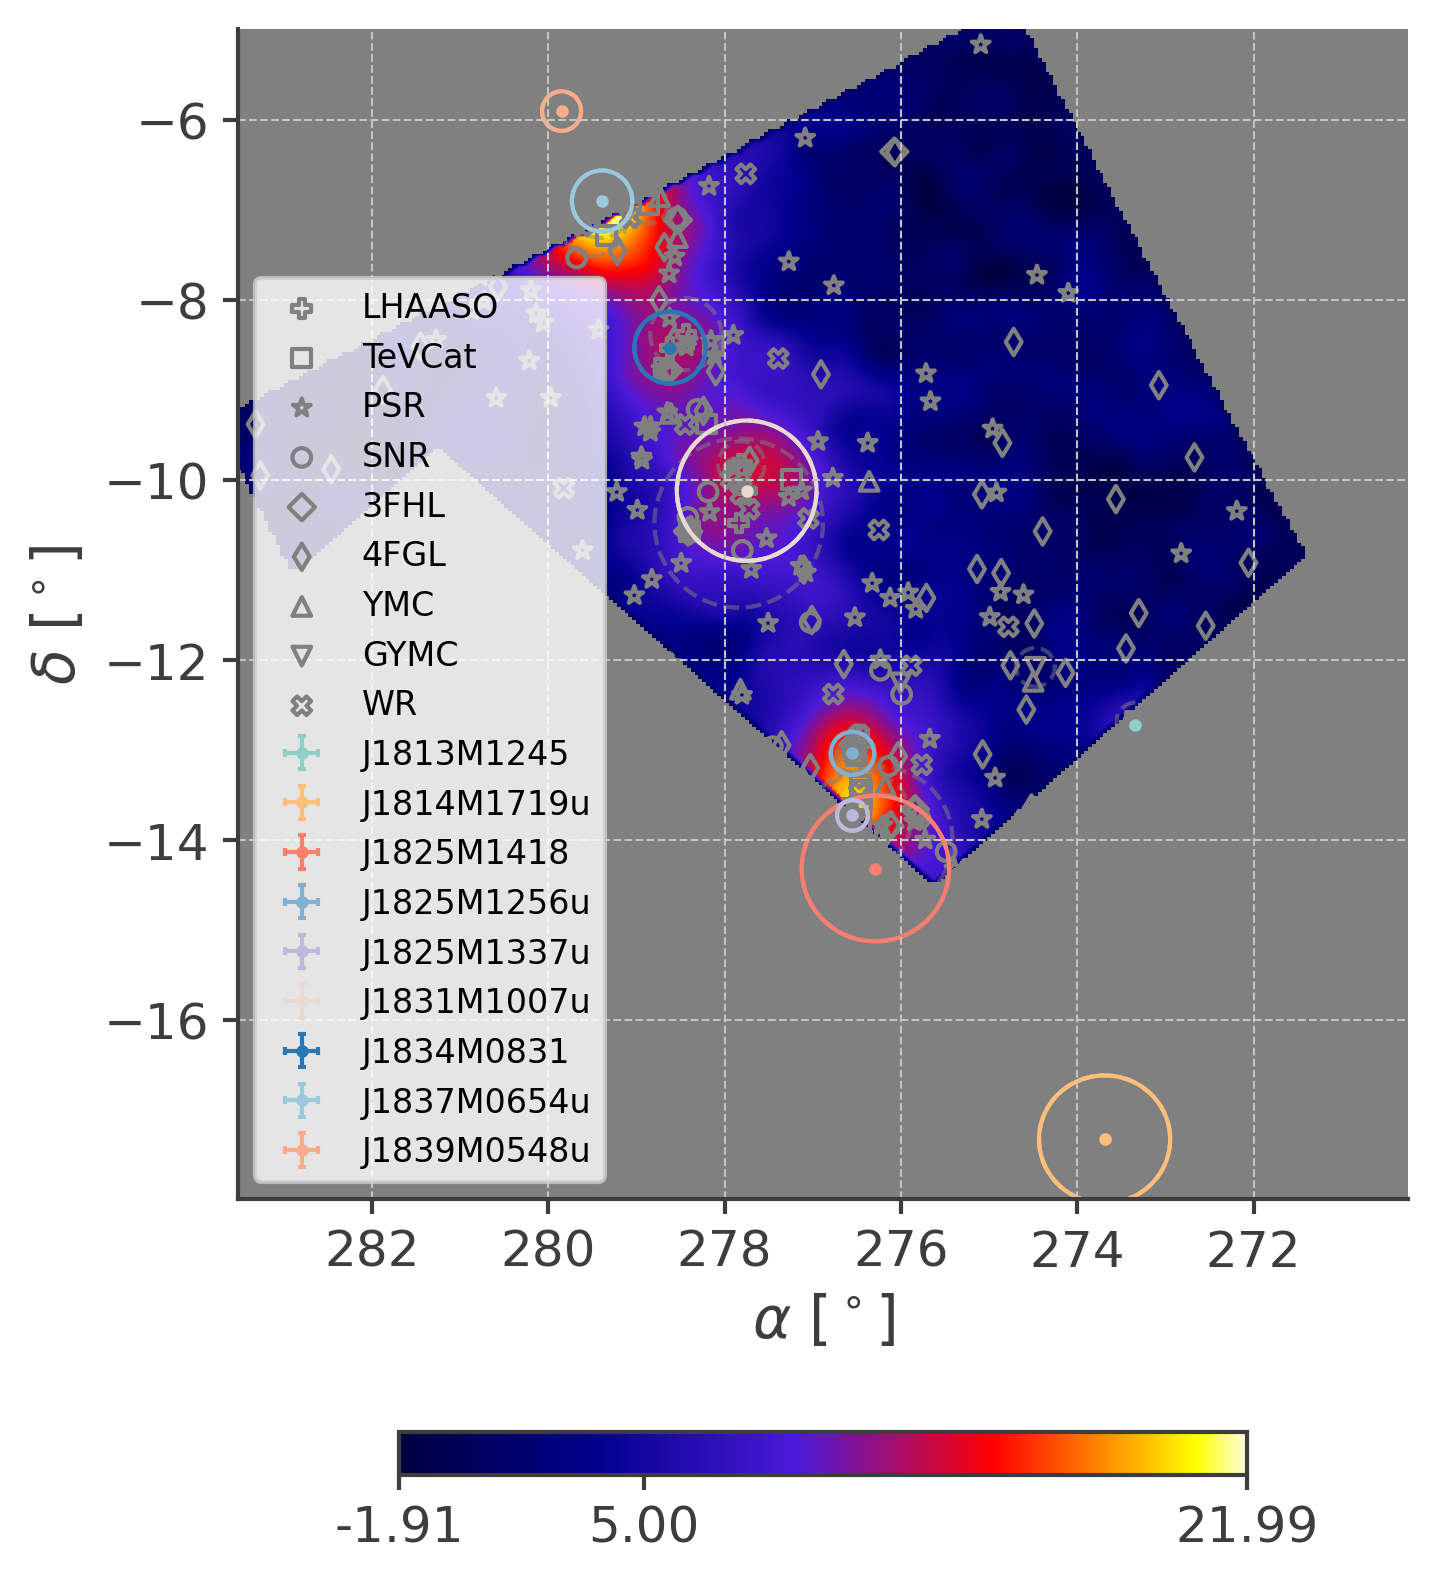

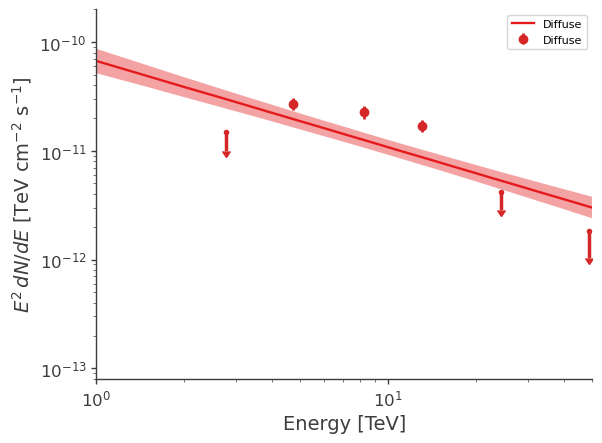

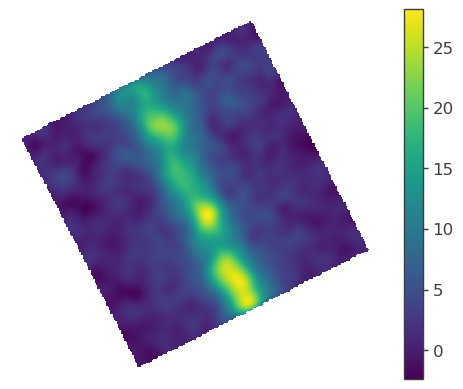

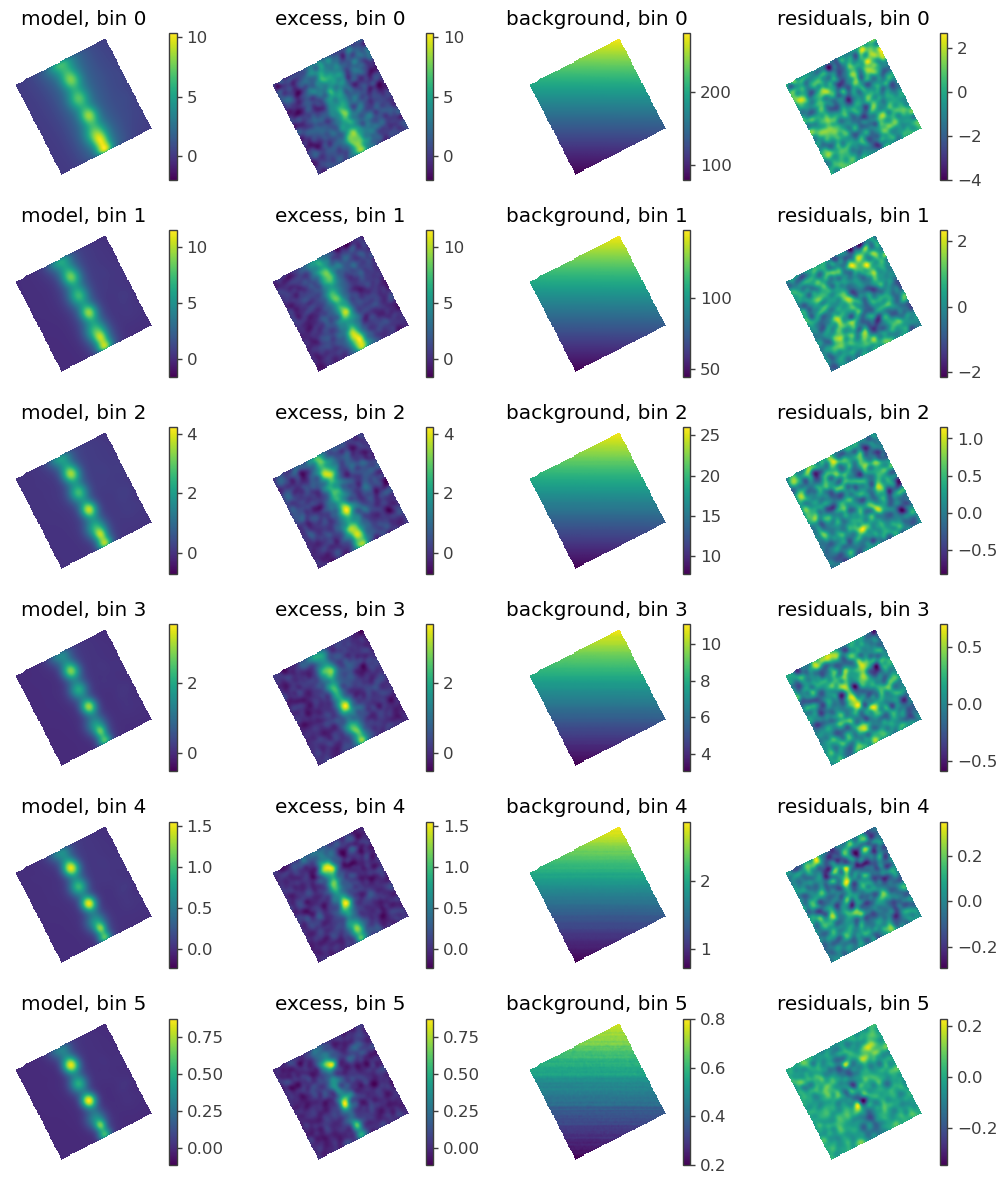

<Figure size 640x480 with 0 Axes>

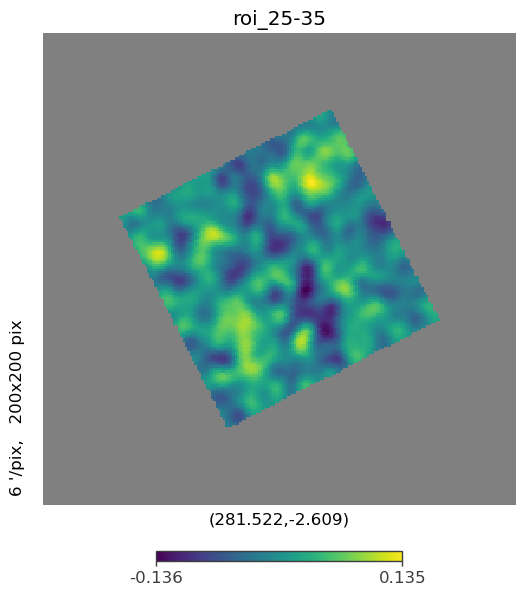

LHAASO:  1 278.62 -8.53 1LHAASO J1834-0831  0.4
LHAASO:  2 278.44 -8.38 1LHAASO J1834-0831   0.4
LHAASO:  3 279.39 -6.9 1LHAASO J1837-0654u  0.34
LHAASO:  4 279.31 -6.86 1LHAASO J1837-0654u   0.33
LHAASO:  5 279.79 -5.81  1LHAASO J1839-0548u  0.22
LHAASO:  6 279.85 -5.9  1LHAASO J1839-0548u   0.22
LHAASO:  7 280.33 -5.33 1LHAASO J1841-0519  0.6
LHAASO:  8 280.21 -5.23 1LHAASO J1841-0519   0.62
LHAASO:  9 280.91 -3.6  1LHAASO J1843-0335u  0.36
LHAASO:  10 281.01 -3.5  1LHAASO J1843-0335u   0.4
LHAASO:  11 282.06 -1.89 1LHAASO J1848-0153u  0.51
LHAASO:  12 282.02 -1.78 1LHAASO J1848-0153u   0.56
LHAASO:  13 282.19 -0.02  1LHAASO J1848-0001u  0.0
LHAASO:  14 282.19 -0.02  1KM2A J1848-0001u  0
LHAASO:  15 282.74 -0.07 1LHAASO J1850-0004u*  0.46
LHAASO:  16 282.89 -0.07 1LHAASO J1850-0004u*   0.21
LHAASO:  17 283.1 0.84  1LHAASO J1852+0050u*  0.85
LHAASO:  18 283.73 1.4  1LHAASO J1852+0050u*   0.64
LHAASO:  19 284.37 2.75 1LHAASO J1857+0245  0.24
LHAASO:  20 284.38 2.06  1WCDA J1857+0203u  

Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(1.08 +/- 0.32) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1564.74257
total,1564.74257


Values of statistical measures:

,statistical measures
AIC,3131.485162
BIC,3141.601398


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(4.02 +/- 0.28) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1543.437591
total,1543.437591


Values of statistical measures:

,statistical measures
AIC,3088.875205
BIC,3098.991440


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(5.6 +/- 0.4) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1511.688183
total,1511.688183


Values of statistical measures:

,statistical measures
AIC,3025.376387
BIC,3035.492623


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(5.14 +/- 0.35) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1467.839545
total,1467.839545


Values of statistical measures:

,statistical measures
AIC,2937.679113
BIC,2947.795348


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(3.0 +/- 0.4) x 10^-21,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1316.254557
total,1316.254557


Values of statistical measures:

,statistical measures
AIC,2634.509137
BIC,2644.625372


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(4 +/- 4) x 10^-22,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1371.843521
total,1371.843521


Values of statistical measures:

,statistical measures
AIC,2745.687064
BIC,2755.803300


100%|██████████| 6/6 [01:50<00:00, 18.33s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



00:18:08 INFO      Region of Interest:                                                                   ]8;id=616023;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=548079;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=500132;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=641461;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (286.095, 6.287), model radius: 7.000 ]8;id=620415;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=373207;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  deg, display radius: 6.500 deg, threshold = 0.50                                                 

         INFO                                                                                            ]8;id=466095;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=246237;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=268066;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=63596;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=474824;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=506233;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 84 x 84 px                                                             ]8;id=111372;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=739557;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=55217;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=522124;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=247954;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=491600;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=594006;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=231686;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=415236;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=697004;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=849034;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=134115;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=130458;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=33299;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=687250;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=277026;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=345863;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=461382;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=972458;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=483553;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=70482;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=137164;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,9.849485e+06,9.777575e+06,1.007355,30462,99.869387
1,1,1024,RING,5.175322e+06,5.094172e+06,1.015930,30462,99.869387
2,2,1024,RING,9.182871e+05,8.884714e+05,1.033558,30462,99.869387
3,3,1024,RING,3.969280e+05,3.766242e+05,1.053910,30462,99.869387
4,4,1024,RING,1.072815e+05,9.892997e+04,1.084418,30462,99.869387
5,5,1024,RING,2.961811e+04,2.627849e+04,1.127086,30462,99.869387


         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=131727;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=778459;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=559356;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=503450;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=484820;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=926064;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=344483;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=794433;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=603590;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=114216;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=513129;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=358915;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

00:18:09 INFO      Set WCDA tansit from: 795.9613310185185 to 796.2928263888889                         ]8;id=848700;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py\Mymap.py]8;;\:]8;id=720884;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mymap.py#41\41]8;;\

00:18:11 INFO      J1852P0050u in model_radius: 7 sf:True pf:True kf:True indexf:True                  ]8;id=359198;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=97091;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=343760;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=186297;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.67e-13 kb=(1.00e-15, 1.52e-12) index=-2.74 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=38387;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=209213;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.64 sb=(0.08,1.20) fitrange=1.60                                                         

         INFO      J1857P0245 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=391786;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=536121;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=137801;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=814417;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.04e-13 kb=(1.00e-15, 1.26e-12) index=-2.93 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=303218;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=70721;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.24 sb=(0.00,0.56) fitrange=0.88                                                         

         INFO      J1857P0203u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=95658;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=260105;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=831796;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=256539;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.68e-13 kb=(1.00e-15, 8.13e-13) index=-2.46 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=989881;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=248979;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.19 sb=(0.00,0.43) fitrange=0.88                                                         

         INFO      J1858P0330 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=326170;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=559092;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=831577;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=326914;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=2.84e-13 kb=(1.00e-15, 1.23e-12) index=-2.63 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=6412;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=517297;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.52 sb=(0.00,1.16) fitrange=2.72                                                         

         INFO      J1902P0648 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=37680;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=566173;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=727636;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=226038;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.50e-14 kb=(1.00e-15, 2.40e-13) index=-2.39 indexb=(-4.00,-1.00)                             

         INFO      Mor: fitrange=0.80                                                                  ]8;id=189329;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=708490;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#353\353]8;;\

         INFO      J1906P0712 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=935535;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=853777;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=35952;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=986567;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.01e-13 kb=(1.00e-15, 4.76e-13) index=-2.72 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=791035;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=111503;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.21 sb=(0.00,0.61) fitrange=1.68                                                         

         INFO      J1907P0826 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=242517;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=63497;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=671126;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=670082;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.34e-13 kb=(1.00e-15, 5.69e-13) index=-2.62 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=764663;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=338663;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.43 sb=(0.00,1.07) fitrange=2.48                                                         

         INFO      J1908P0615u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=769361;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=905180;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=700484;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=173929;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=7.97e-13 kb=(1.00e-15, 1.61e-12) index=-2.42 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=470334;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=690589;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.43 sb=(0.27,0.59) fitrange=0.40                                                         

         INFO      J1910P0516 in roi: 6.5 sf:True pf:True kf:False indexf:False                        ]8;id=584652;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=561099;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=247925;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=130427;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=8.60e-14 kb=(1.00e-15, 5.21e-13) index=-2.54 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=256488;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=232632;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.29 sb=(0.00,1.01) fitrange=3.04                                                         

         INFO      J1912P1014u in roi: 6.5 sf:True pf:True kf:False indexf:False                       ]8;id=235372;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=825184;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=166314;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=859685;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=3.07e-13 kb=(1.00e-15, 6.67e-13) index=-2.68 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=488968;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=352339;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.36 sb=(0.12,0.60) fitrange=0.64                                                         

         INFO      J1914P1150u in model_radius: 7 sf:True pf:True kf:True indexf:True                  ]8;id=546079;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=843393;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=890367;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=428943;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.09e-13 kb=(1.00e-15, 2.89e-13) index=-2.34 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=311836;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=125650;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.33 sb=(0.01,0.65) fitrange=1.12                                                         

         INFO      Set diffuse range: [31, 47] [-8, 8]                                                ]8;id=830295;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=731709;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1054\1054]8;;\

         INFO      ra dec coner:                                                                      ]8;id=946410;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=721765;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1055\1055]8;;\

         INFO      (289.1237501126153, -5.346118102161174)                                            ]8;id=157316;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=659451;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1056\1056]8;;\

         INFO      (296.5291083447021, 8.671403139733373)                                             ]8;id=79314;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=286124;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1057\1057]8;;\

         INFO      (282.018324697397, 16.12231323547236)                                              ]8;id=170076;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=902733;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1058\1058]8;;\

         INFO      (274.85999095399006, 1.9340616592345006)                                           ]8;id=180490;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=614623;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1059\1059]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=222055;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=93697;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1098\1098]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 1.096060119544788e-05                                                 ]8;id=343408;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=211306;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1099\1099]8;;\
                  ratio: 0.0864962107600871                                                                        

         INFO      set K to: 1e-12                                                                    ]8;id=85265;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=197296;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1100\1100]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_case9_dust_bkg_template.fits            ]8;id=62520;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=558260;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1127\1127]8;;\

Model summary:
==============

                   N
Point sources      1
Extended sources  11
Particle sources   0

Free parameters (20):
--------------------

                                         value min_value max_value   
J1857P0245.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
J1857P0245.spectrum.main.Powerlaw.index  -2.93      -4.0      -1.0   
J1857P0203u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1857P0203u.spectrum.main.Powerlaw.index -2.46      -4.0      -1.0   
J1858P0330.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1858P0330.spectrum.main.Powerlaw.index  -2.63      -4.0      -1.0   
J1902P0648.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1902P0648.spectrum.main.Powerlaw.index  -2.39      -4.0      -1.0   
J1906P0712.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1906P0712.spectrum.main.Powerlaw.index  -2.72      -4.0      -1.0   
J1907P0826.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1907P0826.spectrum.main.Powerlaw.index  -2.62      -4.0      -1.0   
J1908P0615u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1908P0615u.spectrum.main.Powerlaw.index -2.42      -4.0      -1.0   
J1910P0516.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1910P0516.spectrum.main.Powerlaw.index  -2.54      -4.0      -1.0   
J1912P1014u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1912P1014u.spectrum.main.Powerlaw.index -2.68      -4.0      -1.0   
Diffuse.spectrum.main.Powerlaw.K           0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index      -2.5      -4.5      -0.5   

                                                    unit  
J1857P0245.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1857P0245.spectrum.main.Powerlaw.index                   
J1857P0203u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1857P0203u.spectrum.main.Powerlaw.index                  
J1858P0330.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1858P0330.spectrum.main.Powerlaw.index                   
J1902P0648.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1902P0648.spectrum.main.Powerlaw.index                   
J1906P0712.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1906P0712.spectrum.main.Powerlaw.index                   
J1907P0826.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1907P0826.spectrum.main.Powerlaw.index                   
J1908P0615u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1908P0615u.spectrum.main.Powerlaw.index                  
J1910P0516.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1910P0516.spectrum.main.Powerlaw.index                   
J1912P1014u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1912P1014u.spectrum.main.Powerlaw.index                  
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (51):
---------------------

                                                                                      value   
J1852P0050u.Gaussian_on_sphere.lon0                                                  283.73  \
J1852P0050u.Gaussian_on_sphere.lat0                                                     1.4   
J1852P0050u.Gaussian_on_sphere.sigma                                                   0.64   
J1852P0050u.spectrum.main.Powerlaw.K                                                    0.0   
J1852P0050u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1852P0050u.spectrum.main.Powerlaw.index                                              -2.74   
J1857P0245.Gaussian_on_sphere.lon0                                                   284.37   
J1857P0245.Gaussian_on_sphere.lat0                                                     2.75   
J1857P0245.Gaussian_on_sphere.sigma                                                    0.24   
J1857P0245.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1857P0203u.Gaussian_on_sphere.lon0   

00:18:12 INFO      Considering 8 dec bins for extended source J1852P0050u           ]8;id=615370;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=865828;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.400                       ]8;id=271770;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=22701;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0245            ]8;id=336538;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=142690;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 2.750                       ]8;id=623161;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=788070;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=277211;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=195566;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.980                       ]8;id=610111;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=322603;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1858P0330            ]8;id=248876;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=98917;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 3.700                       ]8;id=15245;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=653828;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1906P0712            ]8;id=717867;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=614070;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 7.200                       ]8;id=331654;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=151226;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1907P0826            ]8;id=822183;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=771909;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 8.440                       ]8;id=887443;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=724812;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=413640;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=769414;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.260                       ]8;id=793816;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=659867;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1910P0516            ]8;id=332442;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=163017;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.070                       ]8;id=568096;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=674382;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1912P1014u           ]8;id=135034;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=371824;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 10.250                      ]8;id=791563;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=467601;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1914P1150u           ]8;id=505690;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=547161;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 11.740                      ]8;id=890635;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=982129;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=360493;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=868701;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.521                       ]8;id=517694;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=163010;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=92987;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=170736;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=42177;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=931673;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
J1857P0245.spectrum.main.Powerlaw.K,(3.49 -0.18 +0.19) x 10^-22,1 / (keV s cm2)
J1857P0245.spectrum.main.Powerlaw.index,-2.80 +/- 0.05,
J1857P0203u.spectrum.main.Powerlaw.K,(1.32 -0.18 +0.20) x 10^-22,1 / (keV s cm2)
J1857P0203u.spectrum.main.Powerlaw.index,-2.41 +/- 0.09,
J1858P0330.spectrum.main.Powerlaw.K,(2.15 -0.25 +0.28) x 10^-22,1 / (keV s cm2)
J1858P0330.spectrum.main.Powerlaw.index,-2.61 +/- 0.09,
J1902P0648.spectrum.main.Powerlaw.K,(3.5 -0.9 +1.3) x 10^-23,1 / (keV s cm2)
J1902P0648.spectrum.main.Powerlaw.index,-2.30 +/- 0.18,
J1906P0712.spectrum.main.Powerlaw.K,(8.0 -1.2 +1.5) x 10^-23,1 / (keV s cm2)


Correlation matrix:

1.00,-0.43,-0.34,0.25,-0.29,0.17,0.03,-0.02,0.02,-0.01,0.05,-0.02,0.04,-0.02,0.01,-0.01,0.05,-0.02,-0.11,0.06
-0.43,1.00,0.18,-0.21,0.16,-0.20,-0.01,0.02,-0.01,0.02,-0.02,0.04,-0.02,0.03,-0.01,0.01,-0.02,0.04,0.06,-0.12
-0.34,0.18,1.00,-0.84,0.11,-0.04,0.03,-0.02,0.03,-0.02,0.07,-0.03,0.04,-0.02,0.01,-0.01,0.06,-0.02,-0.15,0.06
0.25,-0.21,-0.84,1.00,-0.07,0.05,-0.02,0.02,-0.02,0.02,-0.04,0.03,-0.03,0.02,-0.01,0.01,-0.04,0.03,0.10,-0.10
-0.29,0.16,0.11,-0.07,1.00,-0.58,0.08,-0.06,0.09,-0.04,0.20,-0.08,0.11,-0.06,0.03,-0.01,0.18,-0.07,-0.45,0.18
0.17,-0.20,-0.04,0.05,-0.58,1.00,-0.04,0.04,-0.04,0.05,-0.09,0.10,-0.06,0.06,-0.01,0.01,-0.08,0.09,0.21,-0.32
0.03,-0.01,0.03,-0.02,0.08,-0.04,1.00,-0.89,-0.08,0.07,0.09,-0.04,0.02,0.00,0.02,-0.01,0.08,-0.04,-0.20,0.10
-0.02,0.02,-0.02,0.02,-0.06,0.04,-0.89,1.00,0.07,-0.06,-0.07,0.04,-0.01,-0.00,-0.02,0.01,-0.06,0.04,0.16,-0.12
0.02,-0.01,0.03,-0.02,0.09,-0.04,-0.08,0.07,1.00,-0.66,-0.09,0.07,-0.25,0.17,0.05,-0.04,0.08,-0.04,-0.20,0.10
-0.01,0.02,-0.02,0.02,-0.04,0.05,0.07,-0.06,-0.66,1.00,0.08,-0.07,0.19,-0.19,-0.03,0.03,-0.04,0.05,0.10,-0.16
0.05,-0.02,0.07,-0.04,0.20,-0.09,0.09,-0.07,-0.09,0.08,1.00,-0.57,0.12,-0.06,0.04,-0.02,0.12,-0.02,-0.45,0.18


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,9177.622616
total,9177.622616


Values of statistical measures:

,statistical measures
AIC,18395.249829
BIC,18597.565127


Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

00:19:57 INFO      Considering 8 dec bins for extended source J1852P0050u           ]8;id=61197;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=376379;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.400                       ]8;id=93711;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=393317;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0245            ]8;id=620719;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=924644;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 2.750                       ]8;id=57128;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=481921;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=852160;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=691367;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.980                       ]8;id=672120;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=89745;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1858P0330            ]8;id=933375;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=453529;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 3.700                       ]8;id=460579;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=938577;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1906P0712            ]8;id=589037;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=132272;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 7.200                       ]8;id=291285;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=281248;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1907P0826            ]8;id=271181;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=392847;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 8.440                       ]8;id=557406;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=704966;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=256423;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=338791;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.260                       ]8;id=261235;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=417699;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1910P0516            ]8;id=772607;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=716267;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.070                       ]8;id=154067;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=39575;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1912P1014u           ]8;id=635202;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=344995;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 10.250                      ]8;id=568884;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=273432;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1914P1150u           ]8;id=515412;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=905818;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 11.740                      ]8;id=737666;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=595218;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=109184;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=80672;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.521                       ]8;id=867590;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=205357;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



In [44]:
%matplotlib inline
#####   Data Initialize
# activate_warnings()

# maptree = "../../data/gcd_new.root"
# response="../../data/WCDA_DR_psf.root"

# maptree =  "../../data/hsc2healpix_20210305_20220930.root"
# response = "../../data/WCDA_DR2.root"

# maptree =  "../../data/20210305_20230731_ihep_no_goodlist.root"
# response = "../../data/DR_ihep_MK2.root"

# maptree =  "../../data/20210305_20230731_ihep_goodlist.root"
# response = "../../data/DR_ihep_MK2_newpsf.root"

maptree =  "../../data/20210305-20230731_trans_fromhsc.root"
response = "../../data/DR_ihep_MK2_newoldDRpsf.root"


region_name="Diffuse_WCDA_case9"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')


nside=2**10
npix=hp.nside2npix(nside)
pixarea = 4 * np.pi/npix
pixIdx = hp.nside2npix(nside) # number of pixels I can get from this nside
pixIdx = np.arange(pixIdx) # pixel index numbers
new_lats = hp.pix2ang(nside, pixIdx)[0] # thetas I need to populate with interpolated theta values
new_lons = hp.pix2ang(nside, pixIdx)[1] # phis, same
c_icrs = SkyCoord(ra=new_lons*180/np.pi*u.degree, dec=90*u.degree-new_lats*180/np.pi*u.degree, frame='icrs')
c_l=c_icrs.galactic.l.deg
c_b=c_icrs.galactic.b.deg

resultsall = []
for i,gl in enumerate(range(10,60,10)): # #!!!!!!!!!!!!!!!!!!!365
    c_gal = SkyCoord(l=(gl)*u.degree, b=0*u.degree, frame='galactic')
    RA_center=c_gal.icrs.ra.deg
    Dec_center=c_gal.icrs.dec.deg
    if (Dec_center<-20. or Dec_center>80.): continue
    signal=np.zeros(npix,dtype=np.float64)
    mask = ( (c_l< gl + 5) & (c_l > gl - 5) & (c_b <5.) & (c_b>-5) & (90-new_lats/np.pi*180>-20) & (90-new_lats/np.pi*180<80)) #&(new_lats<110/180*np.pi )  & (new_lats > 10/180*np.pi )
        
    signal[mask]=1
    # hp.mollview(signal,title="ROI",norm='hist')
    # hp.graticule()
    ra1,dec1=RA_center, Dec_center

    data_radius = 6.5
    model_radius = 7

    roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=signal)

    WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=0.17)

    #####   Data Situation
    %matplotlib inline
    WCDA.set_active_measurements(0, 5)
    WCDA.display()
    WCDA.psf_integration_method="fast"

    my.settransWCDA(WCDA, ra1, dec1)

    Modelname=f"roi_{gl - 5}-{gl + 5}"
    if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
        os.system(f'mkdir ../res/{region_name}/{Modelname}/')
    fig = WCDA.display_stacked_image(smoothing_kernel_sigma=0.25)
    fig.savefig(f"../res/{region_name}/{Modelname}_counts_all.png",dpi=300)

    lm = my.getcatModel(ra1, dec1, data_radius, model_radius, rtsigma=8, rtflux=15, rtindex=10, rtp=8,  detector="WCDA", roi=roi, pf=True, sf=True, kf=False, indexf=False,  mkf=True, mindexf=True, indexb=(-4,-1))

    Diffuse, diffscaleratio = my.set_diffusebkg(
                ra1, dec1, 8, 8, Kf=False, indexf=False, name=region_name, ifreturnratio=True, Kb=(1e-18, 1e-10), indexb=(-4.5, -0.5), index=-2.5, K=1e-12
                ) #Kn=1
    
    lm.add_source(Diffuse)

    lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)
    lm.display(complete=True)

    result = my.fit(region_name, Modelname, WCDA, lm, 0, 5, mini="ROOT") #, ifgeterror=True
    sources = my.get_sources(lm,result)
    resultsall.append([result, sources, diffscaleratio])

    resu = my.getressimple(WCDA, lm)
    new_source_idx = np.where(resu==np.ma.max(resu))[0][0]
    new_source_lon_lat=hp.pix2ang(1024,new_source_idx,lonlat=True)
    print(new_source_lon_lat)

    plt.figure()
    hp.gnomview(resu,norm='',rot=[ra1,dec1],xsize=200,ysize=200,reso=6,title=Modelname)
    plt.scatter(new_source_lon_lat[0],new_source_lon_lat[1],marker='x',color='red')
    plt.show()
    plt.savefig(f"../res/{region_name}/{Modelname}_res.png",dpi=300)

    map2, skymapHeader = hp.read_map("../../data/fullsky_WCDA_llh-2.6.fits.gz",h=True)
    map2 = my.maskroi(map2, roi)
    sources.pop("Diffuse")
    fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=2*data_radius, contours=[10000],save=1, 
                    color="Fermi",
                    colors = my.colorall
                    )
    # try:
    Flux_WCDA0, jls0  = my.getdatapoint(WCDA, lm, maptree, response, roi, "Diffuse", ifpowerlawM=1, iffixtans=1)
    import matplotlib as mpl

    x_Max=50.
    x_Min=1
    y_Min=0.8e-13
    y_Max=2e-10
    fig,ax = plt.subplots()
    plot_spectra(
        result[0].results,
        sources_to_use=["Diffuse"], #,"ext1","ext2","ext4","ext5","ext6","ext7"|
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit="TeV/(s cm2)",
        subplot=ax,
        )

    my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA0,"Diffuse","tab:red")

    ax.set_xlim(x_Min,x_Max)
    ax.set_ylim(y_Min,y_Max)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
    ax.set_xlabel("Energy [TeV]")
    plt.legend()
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')
    # except:
    #     continue

In [ ]:
reload(my)

roi_10-20


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_20-30


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_30-40


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_40-50


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_50-60


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



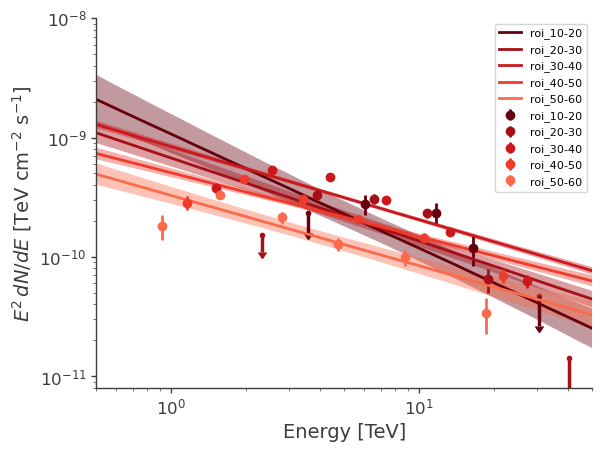

In [37]:
%matplotlib inline
import glob
gc = []
dk = []
dkf = []
de = []
di = []
die = []
den = []
dep = []
dien = []
diep = []
ss = []
ssr= []
x_Max=50.
x_Min=0.5
y_Min=0.8e-11
y_Max=1e-8
fig,ax = plt.subplots()
folder_path = f"/data/home/cwy/Science/3MLWCDA/Standard/res/{region_name}"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[-1].split('-')[-2]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files[:7]):
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Results.fits"
    resultsss = load_analysis_results(specpath)
    resultdict = resultsss.get_data_frame()
    gc.append(range(10,360,10)[i])
    dk.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["value"])
    de.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["error"])
    den.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["negative_error"]))
    dep.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["positive_error"]))
    di.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["value"])
    die.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["error"])
    dien.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["negative_error"]))
    diep.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["positive_error"]))
    try:
        dkf.append(resultsall[i][2][0])
    except:
        resultfile = np.load(f"../res/{region_name}/resultsall.npy")
        dkf = resultfile[9]
    # try:
    plot_spectra(
        resultsss,
        sources_to_use=["Diffuse"],
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit=f"TeV/(s cm2)", #*
        subplot=ax,
        plot_style_kwargs={"label":name, "color":my.red_palette[-(i+1)], "scale":1/dkf[i]} #
        )
    my.Draw_spectrum_fromfile(subfolder+"Spectrum_Diffuse.txt", label=name, color=my.red_palette[-(i+1)], subplot=ax, scale=1/dkf[i])
    # except Exception as e:
    #     print(f"Error: {e}")
    #     continue
results=[gc,dk,de,den,dep,di,die,dien,diep, dkf]
np.save(f"../res/{region_name}/resultsall.npy",results)
from threeML.analysis_results import AnalysisResultsSet
resultsall
rrr = [it[0][0].results for it in resultsall]
analysis_set = AnalysisResultsSet(rrr)

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()
plt.savefig(f"../res/{region_name}/spectrum_band10-70.png",dpi=300)
plt.savefig(f"../res/{region_name}/spectrum_band10-70.pdf",dpi=300)

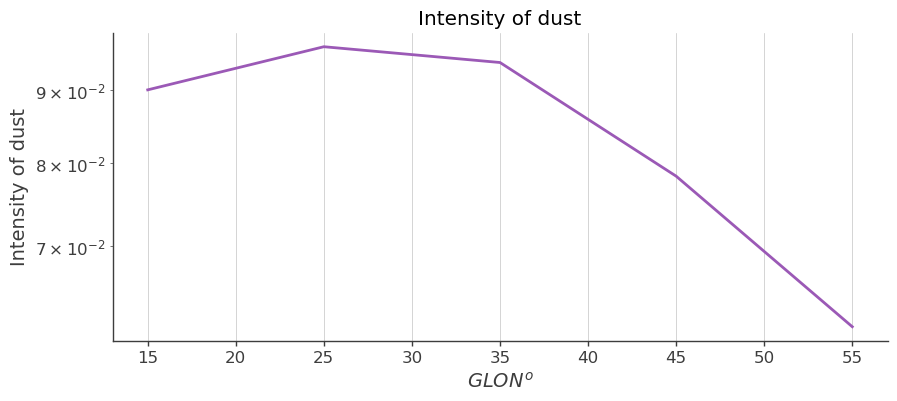

In [38]:
plt.figure(figsize=(10,4)) #
plt.plot(gc, np.array(dkf)) #np.array(den)*1e9, np.array(dep)*1e9 , fmt="o"
plt.yscale("log")
plt.title("Intensity of dust")

plt.ylabel(r"Intensity of dust")
# plt.ylim(1e-7, 1e-4)
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/dust.png",dpi=300)
plt.savefig(f"../res/{region_name}/dust.pdf",dpi=300)

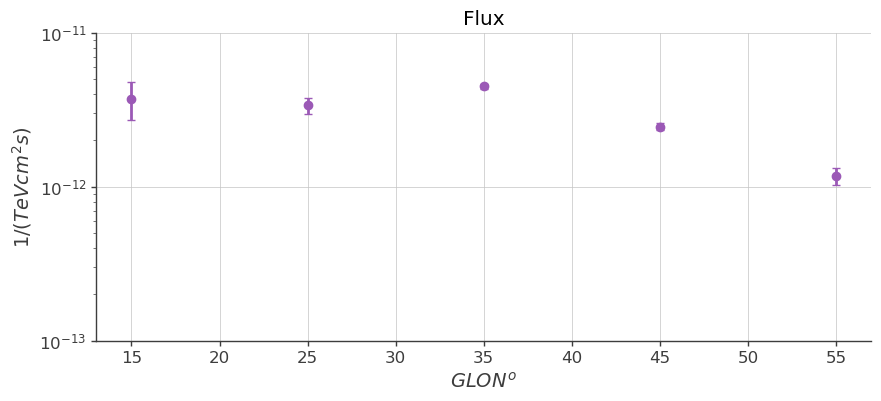

In [39]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9, [np.array(de)*1e9, np.array(de)*1e9], fmt="o", capsize=3) #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-13, 1e-11)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux.pdf",dpi=300)

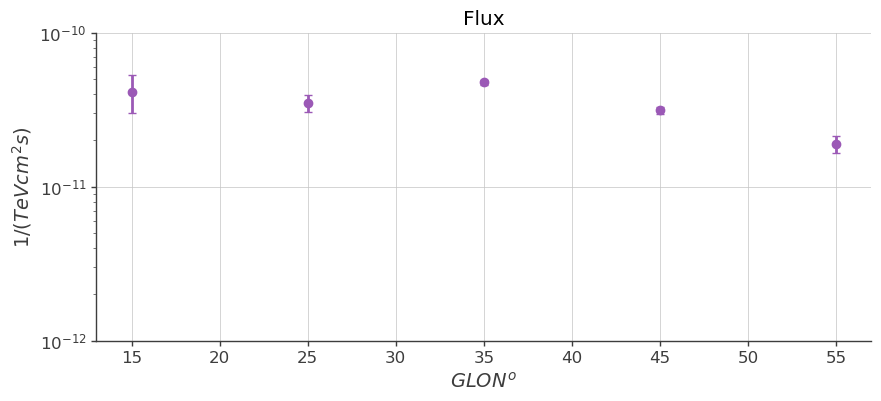

In [40]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9/np.array(dkf), [np.array(de)*1e9/np.array(dkf), np.array(de)*1e9/np.array(dkf)], fmt="o", capsize=3) #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-12, 1e-10)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux_fullsky.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux_fullsky.pdf",dpi=300)

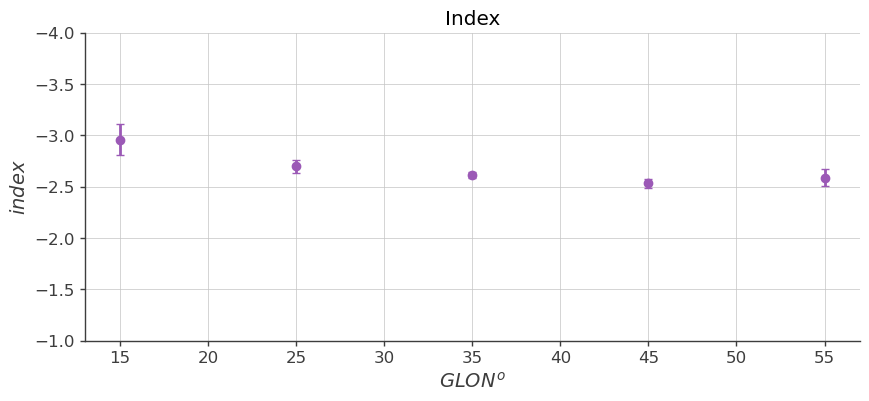

In [41]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, di, [die, die], fmt="o", capsize=3) #dien, diep
plt.ylim(-1,-4)
plt.title("Index")
plt.ylabel(r"$index$")
plt.xlabel(r"$GLON^{o}$")
plt.grid()
plt.savefig(f"../res/{region_name}/index.png",dpi=300)
plt.savefig(f"../res/{region_name}/index.pdf",dpi=300)

In [ ]:
%matplotlib inline
import glob
x_Max=50.
x_Min=0.5
y_Min=0.8e-11
y_Max=1e-8
fig,ax = plt.subplots()
folder_path = f"/data/home/cwy/Science/3MLWCDA/Standard/res/{region_name}"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[-1].split('-')[-2]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files[6:14]):
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Results.fits"
    resultsss = load_analysis_results(specpath)
    # try:
    plot_spectra(
        resultsss,
        sources_to_use=["Diffuse"],
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit=f"TeV/(s cm2)", #*
        subplot=ax,
        plot_style_kwargs={"label":name, "color":my.red_palette[-(i+1)], "scale":1/dkf[i+6]} #
        )
    # except Exception as e:
    #     print(f"Error: {e}")
    #     continue
    

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()
plt.savefig(f"../res/{region_name}/spectrum_band70-150.png",dpi=300)
plt.savefig(f"../res/{region_name}/spectrum_band70-150.pdf",dpi=300)